## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [32]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [12]:
# Your code here . . .
mammals = euk[(euk["Class"] == "Mammals") & (euk["Number of genes"].str.replace('-', '0').astype(int) >= 20_000)]
mammals

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
44,Homo sapiens,Animals,Mammals,3257.32,41.465,60679,119294,2002,Chromosome
45,Mus musculus,Animals,Mammals,2818.97,41.951,48701,78443,2004,Chromosome
65,Rattus norvegicus,Animals,Mammals,2870.18,42.3282,39365,56113,2002,Chromosome
70,Felis catus,Animals,Mammals,2521.86,41.8806,35234,54726,2006,Chromosome
74,Bos taurus,Animals,Mammals,2715.85,41.9362,34966,63696,2017,Chromosome
...,...,...,...,...,...,...,...,...,...
4977,Rattus norvegicus,Animals,Mammals,2616.42,42.3564,36373,28074,2005,Chromosome
5087,Macaca mulatta,Animals,Mammals,2969.97,41.8692,21524,17802,2011,Chromosome
5152,Macaca fascicularis,Animals,Mammals,3126.56,42.0609,21132,17456,2011,Chromosome
5180,Cricetulus griseus,Animals,Mammals,2368.91,41.5,32567,46750,2018,Scaffold


### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [13]:
# Your code here . . .
animals_class = euk.groupby("Class").size()
animals_class

,0
Class,
Amphibians,7
Apicomplexans,254
Ascomycetes,3570
Basidiomycetes,726
Birds,172
Fishes,282
Flatworms,47
Green Algae,86
Insects,602


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [16]:
# Your code here . . .
Unique_species = euk.groupby("Class")["Species"].nunique()
Unique_species

,Species
Class,
Amphibians,6
Apicomplexans,131
Ascomycetes,1859
Basidiomycetes,523
Birds,144
Fishes,218
Flatworms,34
Green Algae,76
Insects,402


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [29]:
# Your code here . . .
mammals_macaca = euk[(euk["Class"] == "Mammals") & (euk["Species"].str.startswith("Macaca"))]
mammals_macaca


,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
119,Macaca mulatta,Animals,Mammals,3236.2200,41.2014,33215,55363,2014,Chromosome
306,Macaca fascicularis,Animals,Mammals,2946.8400,41.3398,33107,62703,2013,Chromosome
1116,Macaca nemestrina,Animals,Mammals,2948.7000,41.3,40715,66484,2015,Scaffold
1845,Macaca fuscata fuscata,Animals,Mammals,2930.7100,40.9,-,-,2018,Contig
4856,Macaca fascicularis,Animals,Mammals,2878.4700,41.2655,-,-,2011,Chromosome
4948,Macaca mulatta,Animals,Mammals,3097.3900,38.0268,-,-,2006,Chromosome
5087,Macaca mulatta,Animals,Mammals,2969.9700,41.8692,21524,17802,2011,Chromosome
5152,Macaca fascicularis,Animals,Mammals,3126.5600,42.0609,21132,17456,2011,Chromosome
5646,Macaca mulatta,Animals,Mammals,2971.3100,41.1015,-,-,2015,Chromosome
5740,Macaca mulatta,Animals,Mammals,11.7537,40.1,-,-,2015,Chromosome


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [25]:
# Your code here . . .
scientific_name = euk["Species"].str.split(" ").str[0:2]
scientific_name
df_species = pd.DataFrame(scientific_name)
df_species

,Species
0,"[Emiliania, huxleyi]"
1,"[Arabidopsis, thaliana]"
2,"[Glycine, max]"
3,"[Medicago, truncatula]"
4,"[Solanum, lycopersicum]"
...,...
8297,"[Saccharomyces, cerevisiae]"
8298,"[Saccharomyces, cerevisiae]"
8299,"[Saccharomyces, cerevisiae]"
8300,"[Saccharomyces, cerevisiae]"


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [33]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
df_unique = euk.groupby("Class")["Species"].nunique()
df_unique

,Species
Class,
Amphibians,6
Apicomplexans,131
Ascomycetes,1859
Basidiomycetes,523
Birds,144
Fishes,218
Flatworms,34
Green Algae,76
Insects,402


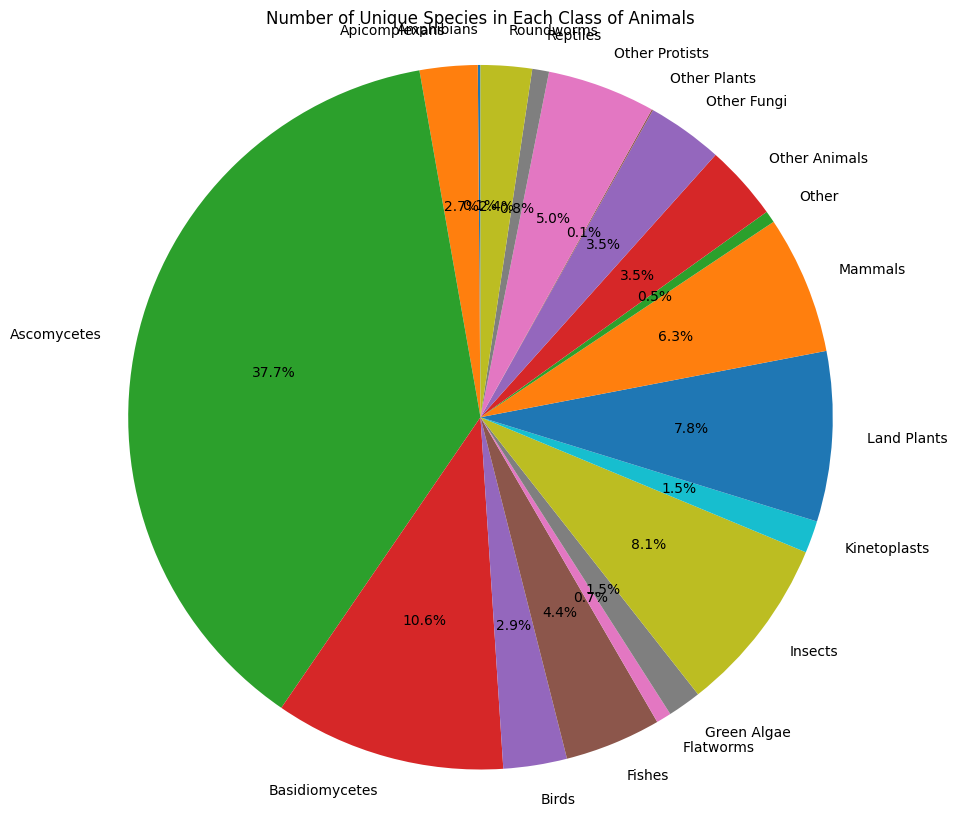

In [37]:
# Create a panda pie plot using the dataframe above

# Your code here . . .
plt.figure(figsize=(10, 10))
plt.pie(df_unique, labels=df_unique.index, autopct='%1.1f%%', startangle=90)
plt.title('Number of Unique Species in Each Class of Animals')
plt.axis('equal')
plt.show()